## 世界選手権のデータを可視化する①
---

In [1]:
%matplotlib inline
import pandas as pd
import os
import re
import time
import matplotlib.pyplot as plt
import scipy.stats

### パラメータ

In [4]:
# 入力ディレクトリ
input_dir_path = "/Users/takayuki/Documents/work/Study/data/detail_data_year/"
input_file_ext = "results_score.csv"

### ファイルパスのリストを取得

In [5]:
input_file_path_list = []
for root, dirs, files in os.walk(input_dir_path):
    for file in files:
        if input_file_ext in file:
            input_file_path_list.append(os.path.join(root, file))
input_file_path_list

["/Users/takayuki/Documents/work/Study/data/detail_data_year/Capital One World Men's Curling Championship 2010_results_score.csv",
 '/Users/takayuki/Documents/work/Study/data/detail_data_year/CPT World Men\xe2\x80\x99s Curling Championship 2014_results_score.csv',
 '/Users/takayuki/Documents/work/Study/data/detail_data_year/Ford World Curling Championships 2002(Men)_results_score.csv',
 '/Users/takayuki/Documents/work/Study/data/detail_data_year/Ford World Curling Championships 2002(Women)_results_score.csv',
 '/Users/takayuki/Documents/work/Study/data/detail_data_year/Ford World Curling Championships 2003(Men)_results_score.csv',
 '/Users/takayuki/Documents/work/Study/data/detail_data_year/Ford World Curling Championships 2003(Women)_results_score.csv',
 '/Users/takayuki/Documents/work/Study/data/detail_data_year/Ford World Curling Championships 2004(Men)_results_score.csv',
 '/Users/takayuki/Documents/work/Study/data/detail_data_year/Ford World Curling Championships 2004(Women)_resul

### データの読み込み

In [4]:
start_time = time.time()

# 各試合のスコアデータを格納するDataFrame
result_score_pd = None

# 各ファイルを順に読み込み、DataFrameに格納する
for file_path in input_file_path_list:
    # CSVファイルの読み込み
    tmp_result_score_pd = pd.read_csv(file_path)
    
    # 勝敗フラグの付与（勝ち：1, 引き分け：0, 負け：-1）
    result_score_list = []
    for row_idx in range(0, tmp_result_score_pd.shape[0], 2):
        score1 = tmp_result_score_pd["score(total)"][row_idx]
        score2 = tmp_result_score_pd["score(total)"][row_idx+1]
        
        if tmp_result_score_pd["draw"][row_idx] != tmp_result_score_pd["draw"][row_idx+1]:
            print "draw is different: row {0} and {1}".format(tmp_result_score_pd["draw"][row_idx], tmp_result_score_pd["draw"][row_idx+1])
        elif tmp_result_score_pd["draw"][row_idx] != tmp_result_score_pd["draw"][row_idx+1]:
            print "sheet is different: row {0} and {1}".format(tmp_result_score_pd["draw"][row_idx], tmp_result_score_pd["draw"][row_idx+1])
        
        if score1 < score2:
            result_score_list.append(-1)
            result_score_list.append(1)
        elif score1 == score2:
            result_score_list.append(0)
            result_score_list.append(0)
        else:
            result_score_list.append(1)
            result_score_list.append(-1)
    
    tmp_result_score_pd["result"] = result_score_list
    
    # 年度、性別の取得
    tmp_list = re.findall(r"[0-9]+", file_path)
    if len(tmp_list) != 1 and len(tmp_list[0]) != 4:
        print "Year is missing: {0} {1}".format(file_path, year)
    year = tmp_list[0]
    
    gender = None
    if "Women" in file_path:
        gender = "Women"
    elif "Men" in file_path:
        gender = "Men"
    else:
        print "Gender is missing: row {0}.".format(row_idx)
    
    tmp_result_score_pd["year"] = [year] * tmp_result_score_pd.shape[0]
    tmp_result_score_pd["gender"] = [gender] * tmp_result_score_pd.shape[0]
    
    # DataFrameに追加
    if result_score_pd is None:
        result_score_pd = tmp_result_score_pd
    else:
        result_score_pd = pd.concat([result_score_pd, tmp_result_score_pd])

# データの年数
year_list = list(set(result_score_pd["year"]))
year_list.sort()
print "the number of years : {0}".format(len(year_list))
print year_list

# 年×男or女
year_gender_pd = result_score_pd[["year", "gender"]]
year_gender_pd = year_gender_pd.drop_duplicates()
year_gender_pd = year_gender_pd.sort_values(by=["year", "gender"])
print "\nthe number of competition : {0}".format(year_gender_pd.shape[0])
year_gender_list = []
for value in year_gender_pd.values:
    year_gender_tuple = tuple(value)
    year_gender_list.append(year_gender_tuple)
print year_gender_list

end_time = time.time()
print "\n\tfinish file readeing: {0} [sec]\n".format(end_time - start_time)

the number of years : 15
['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

the number of competition : 28
[('2002', 'Men'), ('2002', 'Women'), ('2003', 'Men'), ('2003', 'Women'), ('2004', 'Men'), ('2004', 'Women'), ('2005', 'Men'), ('2005', 'Women'), ('2006', 'Men'), ('2006', 'Women'), ('2007', 'Men'), ('2007', 'Women'), ('2008', 'Men'), ('2008', 'Women'), ('2009', 'Men'), ('2010', 'Men'), ('2010', 'Women'), ('2011', 'Men'), ('2012', 'Men'), ('2012', 'Women'), ('2013', 'Men'), ('2013', 'Women'), ('2014', 'Men'), ('2014', 'Women'), ('2015', 'Men'), ('2015', 'Women'), ('2016', 'Men'), ('2016', 'Women')]

	finish file readeing: 0.674188137054 [sec]



### 大会数、試合数、参加チーム数、勝率

大会数: 28
全試合数: 1873

各大会の出場国数: 
year    2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
gender                                                                     
Men     10.0  10.0  10.0  12.0  12.0  12.0  12.0  12.0  12.0  12.0  12.0   
Women   10.0  10.0  10.0  12.0  12.0  12.0  12.0   NaN  12.0   NaN  12.0   

year    2013  2014  2015  2016  
gender                          
Men     12.0  12.0  12.0  12.0  
Women   12.0  12.0  12.0  12.0  


,lose,win,total,winning percentage
team,,,,
Canada,84.0,280.0,364.0,0.769231
Norway,105.0,163.0,268.0,0.608209
Sweden,127.0,195.0,322.0,0.605590
Scotland,141.0,193.0,334.0,0.577844
New Zealand,14.0,18.0,32.0,0.562500
Switzerland,146.0,177.0,323.0,0.547988
United States of America,154.0,171.0,325.0,0.526154
China,101.0,91.0,192.0,0.473958
France,43.0,34.0,77.0,0.441558


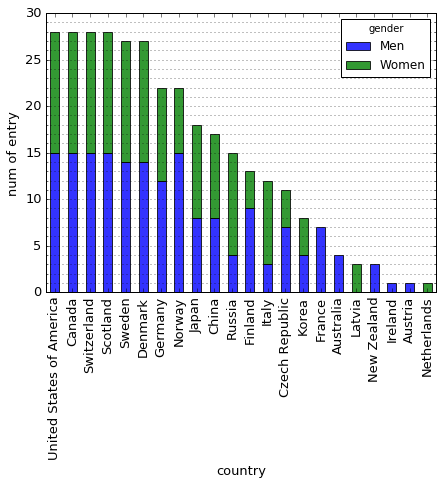

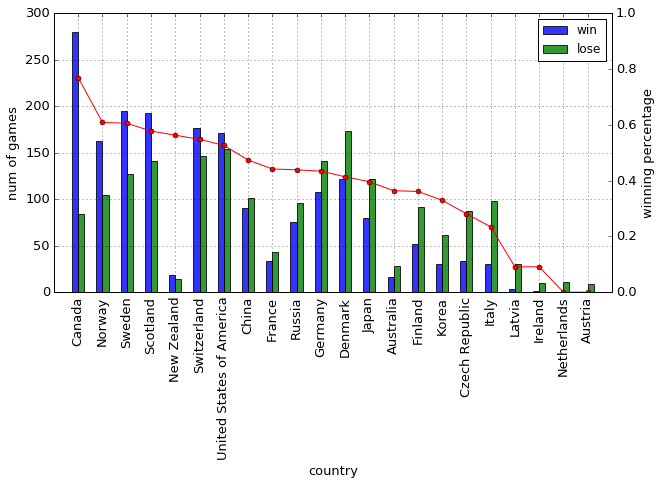

In [74]:
# 大会数
competition_num = result_score_pd[["year", "gender"]].drop_duplicates().shape[0]
print "大会数: {0}".format(competition_num)

# 試合数
game_num = result_score_pd.shape[0] / 2
print "全試合数: {0}".format(game_num)

# 各大会のチーム数
print "\n各大会の出場国数: "
team_num_pd = pd.pivot_table(data=result_score_pd, index="gender", columns="year", values="team", aggfunc=lambda x: len(x.unique()))
print team_num_pd

# 各国の出場回数
team_entry_num_pd = pd.pivot_table(data=result_score_pd, index="team", columns="gender", values="year", aggfunc=lambda x: len(x.unique()))
team_entry_num_pd = team_entry_num_pd.fillna(0)
team_entry_num_pd["total"] = team_entry_num_pd["Men"] + team_entry_num_pd["Women"]
team_entry_num_pd = team_entry_num_pd.sort_values(by="total", ascending=False)

ax = team_entry_num_pd.plot.bar(y=["Men", "Women"], alpha=0.8, stacked=True, figsize=(7, 5))
ax.set_yticks(range(0, 30, 1), minor=True)
ax.grid('on', which='minor', axis='y')
ax.set_ylabel("num of entry", fontsize=13)
ax.set_xlabel("country", fontsize=13)
ax.tick_params(labelsize=13)

# 各国の勝率の計算
win_lose_num_pd = pd.pivot_table(data=result_score_pd, index="team", columns="result", values="draw", aggfunc="count")
win_lose_num_pd = win_lose_num_pd.fillna(0)
win_lose_num_pd.columns = ["lose", "win"]
win_lose_num_pd["total"] =  win_lose_num_pd["lose"] + win_lose_num_pd["win"]
win_lose_num_pd["winning percentage"] = win_lose_num_pd["win"] / win_lose_num_pd["total"]
win_lose_num_pd = win_lose_num_pd.sort_values(by="winning percentage", ascending=False)

# 勝ち数・負け数の棒グラフ
ax = win_lose_num_pd.plot.bar(y=["win", "lose"], alpha=0.8, figsize=(10, 5))
ax.set_ylabel("num of games", fontsize=13)
ax.set_xlabel("country", fontsize=13)
ax.tick_params(labelsize=13)
# 勝率の折れ線グラフ（２軸）
ax2 = ax.twinx()
win_lose_num_pd.plot(ax=ax2, y="winning percentage", color="red", marker="o", markersize=5, legend=False)
ax2.set_ylabel("winning percentage", fontsize=13)
ax2.set_ylim([0.0, 1.0])
ax2.tick_params(labelsize=13)
ax.grid()
ax2.set_xlim([-1, win_lose_num_pd.shape[0]])

win_lose_num_pd

### 得点の分布

### 先攻チームと後攻チームの勝敗数

In [70]:
# 先攻・後攻がわからないゲームは除く


# 勝敗数のカウント
cross_table = pd.pivot_table(data=result_score_pd, index="result", columns="hammer", values="draw", aggfunc="count")
#pd.crosstab(result_score_pd["result"], result_score_pd["hammer"])
print cross_table

# χ2検定 http://qiita.com/ynakayama/items/67ddb321a8ce5b07274c
chi2, p, dof, expected = scipy.stats.chi2_contingency(cross_table)
print "\nχ二乗検定"
print "  χ二乗値: {0}".format(chi2)
print "  p値     : {0}".format(p)

hammer     0     1
result            
-1      1069   804
 1       813  1060

χ二乗検定
  χ二乗値: 69.4356662167
  p値     : 7.89480557029e-17


### 先行チームと後攻チームの得点で散布図を作成

In [67]:
# (先行チーム得点, 後攻チーム得点)のタプルのリスト
hammer_team_score_list = []
not_hammer_team_score_list = []

#--- 先行チーム/後攻チームの得点を取得 ---
# 大会毎に繰り返し
for year_gender in year_gender_list:
    target_pd = result_score_pd[(result_score_pd["year"] == year_gender[0]) & (result_score_pd["gender"] == year_gender[1])]
    
    # 試合毎に繰り返し
    for row_idx in range(0, target_pd.shape[0], 2):
        # 試合の整合性をチェック
        if target_pd["draw"][row_idx] != target_pd["draw"][row_idx+1]:
            print "draw is different: row {0} and {1}".format(target_pd["draw"][row_idx], target_pd["draw"][row_idx+1])
        elif target_pd["draw"][row_idx] != target_pd["draw"][row_idx+1]:
            print "sheet is different: row {0} and {1}".format(target_pd["draw"][row_idx], target_pd["draw"][row_idx+1])
        
        # 2チームの得点・先行/後攻を取得
        score1 = target_pd["score(total)"][row_idx]
        hammer1 = target_pd["hammer"][row_idx]
        score2 = target_pd["score(total)"][row_idx+1]
        hammer2 = target_pd["hammer"][row_idx+1]
        
        # タイムアウトなどにより得点がつかない場合
        if score1 == 'W' and score2 == 'L':
            print "the game time was running out: year {0}, gender {1}, {2}".format(year_gender[0], year_gender[1], target_pd["draw"][row_idx])
            continue
        elif score1 == 'L' and score2 == 'W':
            print "the game time was running out: year {0}, gender {1}, {2}".format(year_gender[0], year_gender[1], target_pd["draw"][row_idx])
            continue
        
        # 文字列は数値に変換
        score1 = int(score1)
        score2 = int(score2)
        
        # リストに追加
        if hammer1 == 1:
            hammer_team_score_list.append(score1)
            not_hammer_team_score_list.append(score2)
        elif hammer2 == 1:
            hammer_team_score_list.append(score2)
            not_hammer_team_score_list.append(score1)
        else:
            print "hammer is wrong: key {0}, {1}, hammer1={2}, hammer2={3}".format(year_gender, target_pd["draw"][row_idx], hammer1, hammer2)
        
        
# 試合数を出力
print "\nthe number of games is " + str(len(hammer_team_score_list))

hammer is wrong: key ('2006', 'Men'), Draw #2, hammer1=0, hammer2=0
hammer is wrong: key ('2006', 'Men'), Draw #2, hammer1=0, hammer2=0
hammer is wrong: key ('2006', 'Men'), Draw #2, hammer1=0, hammer2=0
hammer is wrong: key ('2007', 'Men'), Draw #2, hammer1=0, hammer2=0
hammer is wrong: key ('2007', 'Men'), Draw #2, hammer1=0, hammer2=0
hammer is wrong: key ('2008', 'Women'), Draw #6, hammer1=0, hammer2=0
the game time was running out: year 2012, gender Men, Draw #6
hammer is wrong: key ('2014', 'Men'), Play-off 3/4, hammer1=0, hammer2=0
hammer is wrong: key ('2014', 'Men'), Semifinals, hammer1=0, hammer2=0
hammer is wrong: key ('2014', 'Women'), Tie-break #1, hammer1=0, hammer2=0

the number of games is 1863


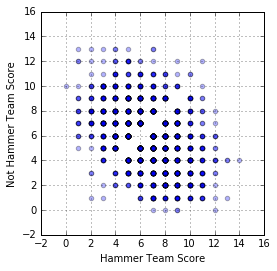

In [24]:
#--- 散布図を描画 ---
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(hammer_team_score_list, not_hammer_team_score_list, alpha=0.3)

# 軸ラベル
ax.set_xlabel("Hammer Team Score")
ax.set_ylabel("Not Hammer Team Score")

# 描画範囲の設定
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
if x_min < y_min:
    y_min = x_min
else:
    x_min = y_min
if x_max < y_max:
    x_max = y_max
else:
    y_max = x_max
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# 縦横比の調整
ax.set_aspect(aspect='equal')

# グリッド線の描画
plt.grid()

# 描画
plt.show()

In [6]:
result_score_pd

,draw,sheet,team,hammer,end1,end2,end3,end4,end5,end6,end7,end8,end9,end10,extra1,extra2,score(total),result,year,gender
0,Draw #1,A,Sweden,1,0,0,0,0,0,0,0,1,0,X,NaN,NaN,1,-1,2010,Men
1,Draw #1,A,France,0,0,1,1,0,2,0,1,0,0,X,NaN,NaN,5,1,2010,Men
2,Draw #1,B,China,0,0,0,0,0,0,1,1,0,2,0,NaN,NaN,4,-1,2010,Men
3,Draw #1,B,Germany,1,0,0,1,1,1,0,0,1,0,1,NaN,NaN,5,1,2010,Men
4,Draw #1,C,Japan,0,0,1,0,1,1,0,2,0,0,1,0.0,NaN,6,-1,2010,Men
5,Draw #1,C,Italy,1,1,0,1,0,0,1,0,2,1,0,1.0,NaN,7,1,2010,Men
6,Draw #1,D,Norway,0,0,0,0,0,2,0,0,1,1,0,NaN,NaN,4,-1,2010,Men
7,Draw #1,D,Scotland,1,0,0,0,2,0,0,1,0,0,2,NaN,NaN,5,1,2010,Men
8,Draw #2,A,Italy,0,0,2,0,2,0,1,0,0,0,1,0.0,NaN,6,-1,2010,Men
9,Draw #2,A,China,1,1,0,2,0,0,0,2,0,1,0,1.0,NaN,7,1,2010,Men
